In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math

In [136]:
ticket = "PETR3.SA"

In [141]:
data = yf.download(ticket, period="3y")

[*********************100%***********************]  1 of 1 completed


In [142]:
data.drop(['High', 'Low','Close','Volume', 'Open'], axis=1, inplace=True)

In [143]:
data

,Adj Close
Date,
2020-08-04,9.497450
2020-08-05,10.110465
2020-08-06,10.144521
2020-08-07,9.923154
2020-08-10,10.259461
...,...
2023-07-28,33.070000
2023-07-31,34.810001
2023-08-01,34.080002


In [147]:
data['Oscilacao'] = (data['Adj Close'].shift(-1) - data['Adj Close'])/data['Adj Close']

In [148]:
data['Oscilacao_t+1'] = data['Oscilacao'].shift(-1)
data['Oscilacao_t+2'] = data['Oscilacao'].shift(-2)

In [157]:
data

,Adj Close,Oscilacao,Oscilacao_t+1,Oscilacao_t+2
Date,,,,
2020-08-04,9.497450,0.064545,0.003368,-0.021821
2020-08-05,10.110465,0.003368,-0.021821,0.033891
2020-08-06,10.144521,-0.021821,0.033891,-0.017013
2020-08-07,9.923154,0.033891,-0.017013,0.015196
2020-08-10,10.259461,-0.017013,0.015196,-0.029522
...,...,...,...,...
2023-07-28,33.070000,0.052616,-0.020971,-0.007042
2023-07-31,34.810001,-0.020971,-0.007042,-0.028369
2023-08-01,34.080002,-0.007042,-0.028369,NaN


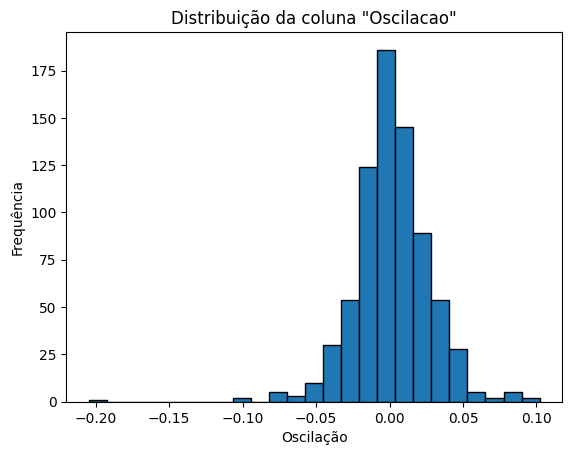

In [158]:
plt.hist(data['Oscilacao'], bins=25, edgecolor='black')
plt.xlabel('Oscilação')
plt.ylabel('Frequência')
plt.title('Distribuição da coluna "Oscilacao"')
plt.show()

In [159]:
mask_positivos = data['Oscilacao'] > 0
mask_negativos = data['Oscilacao'] < 0
ext_inf = round(len(data[mask_positivos]['Oscilacao'])*0.4)
ext_sup = round(len(data[mask_positivos]['Oscilacao'])*0.8)
num_ext_inf = sorted(data[mask_positivos]['Oscilacao'])[ext_inf]
num_ext_sup = sorted(data[mask_positivos]['Oscilacao'])[ext_sup]
mask_inf = num_ext_inf < data['Oscilacao']
mask_sup = num_ext_sup > data['Oscilacao']
mask_positivos_filtrados = mask_sup & mask_inf

In [160]:
print(f"""
media oscilacao t+1 = {data[mask_positivos_filtrados]['Oscilacao_t+1'].mean()}
var oscilacao t+1 = {data[mask_positivos_filtrados]['Oscilacao_t+1'].var()}
media oscilacao t+2 = {data[mask_positivos_filtrados]['Oscilacao_t+2'].mean()}
var oscilacao t+2 = {data[mask_positivos_filtrados]['Oscilacao_t+2'].var()}
""")


media oscilacao t+1 = 0.002723675294100324
var oscilacao t+1 = 0.0006374402729603213
media oscilacao t+2 = -0.000781054193207644
var oscilacao t+2 = 0.0005663058017466154



In [161]:
mask_negativos = data['Oscilacao'] < 0
ext_inf_neg = round(len(data[mask_negativos]['Oscilacao'])*0.4)
ext_sup_neg = round(len(data[mask_negativos]['Oscilacao'])*0.8)
num_ext_inf_neg = sorted(data[mask_negativos]['Oscilacao'])[ext_inf_neg]
num_ext_sup_neg = sorted(data[mask_negativos]['Oscilacao'])[ext_sup_neg]
mask_inf_neg = num_ext_inf_neg < data['Oscilacao']
mask_sup_neg = num_ext_sup_neg > data['Oscilacao']
mask_neg_filtrados = mask_inf_neg & mask_sup_neg

In [166]:
print(f"""
media oscilacao t+1 = {data[mask_neg_filtrados]['Oscilacao_t+1'].mean()}
var oscilacao t+1 = {data[mask_neg_filtrados]['Oscilacao_t+1'].var()}
media oscilacao t+2 = {data[mask_neg_filtrados]['Oscilacao_t+2'].mean()}
var oscilacao t+2 = {data[mask_neg_filtrados]['Oscilacao_t+2'].var()}
""")


media oscilacao t+1 = -0.0006861946568183288
var oscilacao t+1 = 0.0006393663523760499
media oscilacao t+2 = -9.514696802344316e-05
var oscilacao t+2 = 0.0008350479991333875



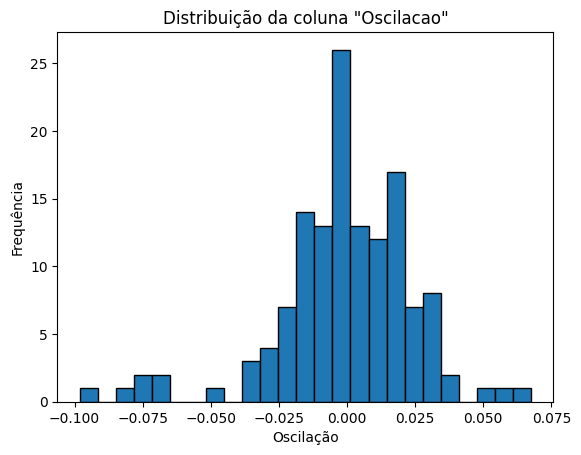

In [167]:
plt.hist(data[mask_neg_filtrados]['Oscilacao_t+1'], bins=25, edgecolor='black')
plt.xlabel('Oscilação')
plt.ylabel('Frequência')
plt.title('Distribuição da coluna "Oscilacao"')
plt.show()

In [168]:
sorted(data[mask_neg_filtrados]['Oscilacao_t+1'])

[-0.09803198283876914,
 -0.07917093069034403,
 -0.0765485102326639,
 -0.07251315552533008,
 -0.0704304433721933,
 -0.06669051405214119,
 -0.04565855064178047,
 -0.03738638159787255,
 -0.03703728635729218,
 -0.033912756384562794,
 -0.03169012611335638,
 -0.028368767143733035,
 -0.027855178426637636,
 -0.026608328726600333,
 -0.024924231481027723,
 -0.02476014315283767,
 -0.024178123831408195,
 -0.023616469891389335,
 -0.021572604833275687,
 -0.019555151801587324,
 -0.01862100070190237,
 -0.018410818947226498,
 -0.018162075971159826,
 -0.017284870451221807,
 -0.016831778258946613,
 -0.016140263271707346,
 -0.015378934981568941,
 -0.01519296411641967,
 -0.014374250176247232,
 -0.014276261434600413,
 -0.014153245058729773,
 -0.013513430524716354,
 -0.013333252542810585,
 -0.012601325465032263,
 -0.012174552080510138,
 -0.011010391773891957,
 -0.010994479585415285,
 -0.00998172850609192,
 -0.00970348913605186,
 -0.009482084947436593,
 -0.009380243570564403,
 -0.009275042085192725,
 -0.00908